### Pre-process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.00,100.00,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.


In [2]:
#Only get pumpkins priced by the bushel
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', 
                                                  case=True, regex=True)]

#Only get the neccessary columns
new_columns = ['Package', 'Variety', 'City Name', 'Month', 
               'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

#Calculate the price to be an average of high and low prices
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

#Get the month and day of year
month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

#Create a new dataframe with the new columns
new_pumpkins = pd.DataFrame(
    {'Month': month,
     'DayOfYear': day_of_year,
     'Variety': pumpkins['Variety'],
     'City': pumpkins['City Name'],
     'Package': pumpkins['Package'],
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'],
     'Price': price}
)

#Convert the price to reflect the pricing by bushel quantity
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

new_pumpkins



C:\Users\蓝白皋\AppData\Local\Temp\ipykernel_21660\2275630046.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.50
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.20
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.20
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.00,17.0,15.30
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...,...,...,...
1738,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,15.00,15.0,30.00
1739,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,13.75,15.0,28.75
1740,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,10.75,15.0,25.75
1741,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,24.00


### Visualization and Analysis

Month & Price Correlation:  -0.14912913634278593
Day of Year & Price Correlation:  -0.1669009250593447


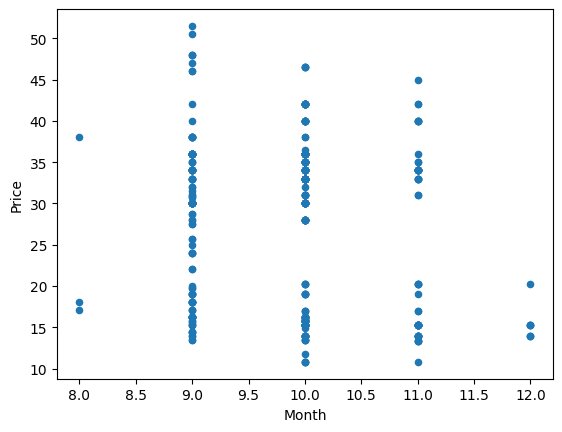

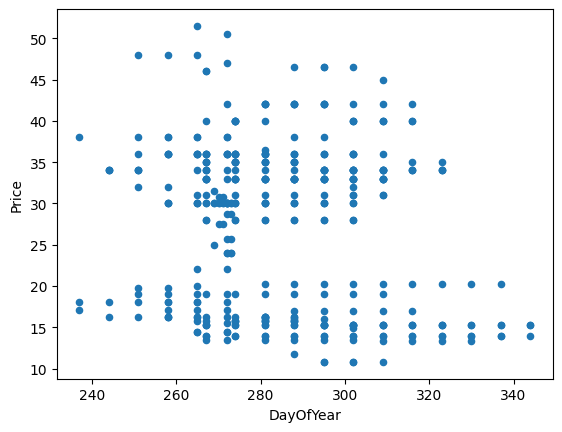

In [3]:
new_pumpkins.plot.scatter(x='Month', y='Price')
new_pumpkins.plot.scatter(x='DayOfYear', y='Price')

# Get correlation
print("Month & Price Correlation: ", new_pumpkins['Month'].corr(new_pumpkins['Price']))
print("Day of Year & Price Correlation: ", new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

make a plot that will show different pumpkin varieties

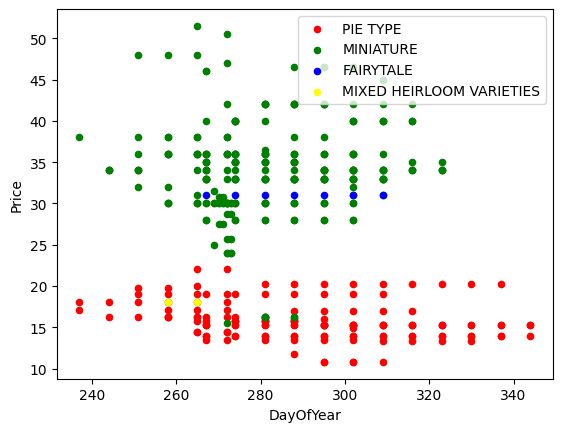

<Axes: xlabel='Variety'>

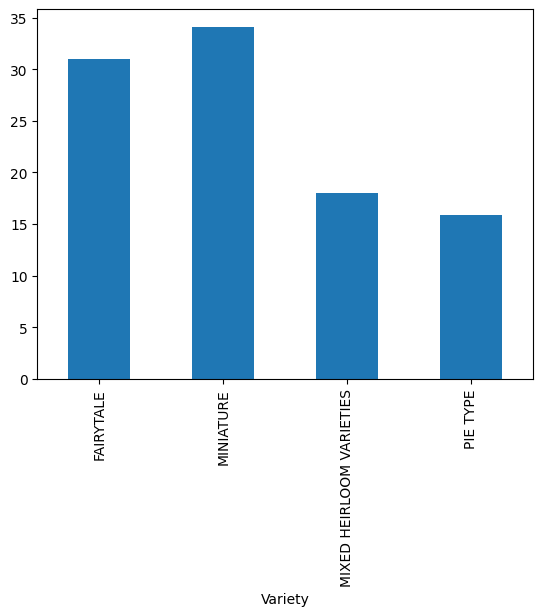

In [4]:
ax = None
colors = ['red', 'green', 'blue', 'yellow']
for (i,var) in enumerate(new_pumpkins['Variety'].unique()):
    variety = new_pumpkins[new_pumpkins['Variety'] == var]
    ax = variety.plot.scatter(x='DayOfYear', y='Price', color=colors[i], label=var, ax=ax)
plt.show()

new_pumpkins.groupby('Variety')['Price'].mean().plot(kind = 'bar')

concentrate only on one variety - pie type

PIE TPYE Pumpkins: DayOfYear & Price Correlation:  -0.266785596914419


<Axes: xlabel='DayOfYear', ylabel='Price'>

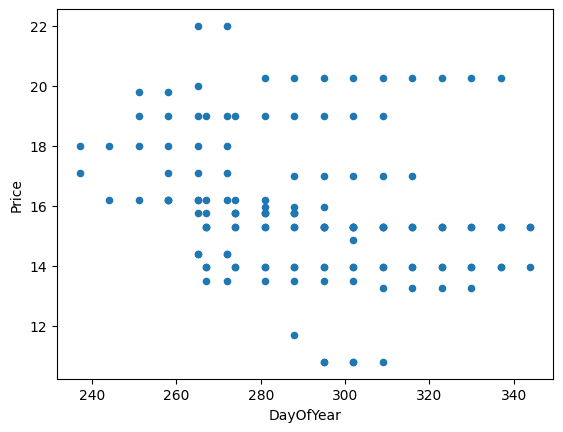

In [5]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
print('PIE TPYE Pumpkins: DayOfYear & Price Correlation: ', pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter(x='DayOfYear', y='Price')

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [7]:
#Get rid of the missing values
pie_pumpkins.dropna(inplace = True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int32  
 1   DayOfYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 9.6+ KB


C:\Users\蓝白皋\AppData\Local\Temp\ipykernel_21660\786654091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace = True)


Define Linear Regression Function 

In [8]:
def run_linear_regression(X,y):
    #Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    #Train the model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    #Predict
    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test, pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')
    score = lin_reg.score(X_train, y_train)
    print(f'Model determination: {score:3.3}')
    
    return lin_reg, X_train, X_test, y_train, y_test,pred

In [9]:
# Selecting feature and taret variables
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

lin_reg, X_train, X_test, y_train, y_test,pred = run_linear_regression(X,y)

Mean error: 2.76 (17.3%)
Model determination: 0.045


Slope: -0.0177, Intercept: 21.1


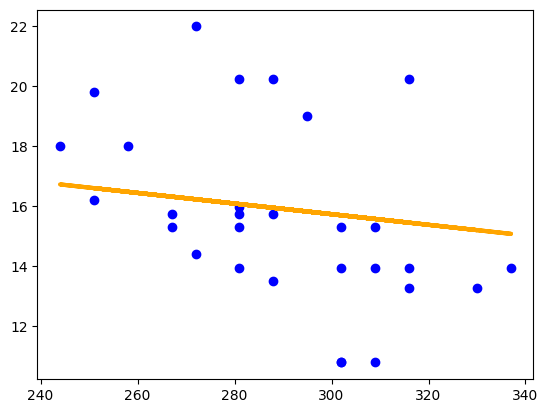

In [10]:
plt.scatter(x = X_test, y = y_test, color='blue')
plt.plot(X_test, pred, color='orange', linewidth=3)

# get slope and intercept
print(f"Slope: {lin_reg.coef_[0]:3.3}, Intercept: {lin_reg.intercept_:3.3}")

### Polynomial Regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def run_polynomial_regression(X,y,degree):
    #Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    #create a pipeline that first adds polynomial features to our model, and then trains the regression
    pipeline = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    pipeline.fit(X_train, y_train)

    #Predict
    pred = pipeline.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test, pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')
    score = pipeline.score(X_train, y_train)
    print(f'Model determination: {score:3.3}')
    
    return pipeline, X_train, X_test, y_train, y_test,pred

In [12]:
pipeline, X_train, X_test, y_train, y_test,pred = run_polynomial_regression(X,y,2)

Mean error: 2.73 (17.2%)
Model determination: 0.0749


y = 0.000514x^2 + -0.319x + 65.0


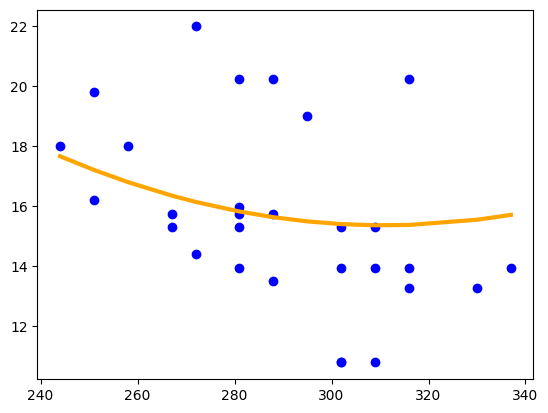

In [13]:
plt.scatter(x = X_test, y = y_test, color='blue')
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)), color='orange', linewidth=3)

#get the coefficients
linear_model = pipeline.named_steps['linearregression']
coefficients = linear_model.coef_
intercept = linear_model.intercept_
print(f"y = {coefficients[2]:3.3}x^2 + {coefficients[1]:3.3}x + {intercept:3.3}")

### Categorical Features


In [14]:
#One-hot encoding
pd.get_dummies(new_pumpkins['Variety'])

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,False,False,False,True
71,False,False,False,True
72,False,False,False,True
73,False,False,False,True
74,False,False,False,True
...,...,...,...,...
1738,False,True,False,False
1739,False,True,False,False
1740,False,True,False,False
1741,False,True,False,False


In [15]:
#Selecting feature and taret variables
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

#Run the linear regression
lin_reg, X_train, X_test, y_train, y_test,pred = run_linear_regression(X,y)


Mean error: 5.26 (19.8%)
Model determination: 0.776


In [16]:
print(f"y = {lin_reg.coef_[0]:3.3}x1 +  {lin_reg.coef_[1]:3.3}x2 + {lin_reg.coef_[2]:3.3}x3 + {lin_reg.intercept_:3.3}")

y = 6.25x1 +  9.21x2 + -6.75x3 + 24.7


### Combine categorical features with numerical features
one-hot encoded categorical + numeric data

In [17]:
X = pd.get_dummies(new_pumpkins[['Variety']])\
    .join(new_pumpkins[['Month']])\
    .join(pd.get_dummies(new_pumpkins[['City']]))\
    .join(pd.get_dummies(new_pumpkins[['Package']]))
y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.6%)
Model determination: 0.941


(LinearRegression(),
       Variety_FAIRYTALE  Variety_MINIATURE  Variety_MIXED HEIRLOOM VARIETIES  \
 1231              False               True                             False   
 90                False              False                             False   
 1244              False               True                             False   
 691               False              False                             False   
 84                False              False                             False   
 ...                 ...                ...                               ...   
 1261              False              False                             False   
 781               False               True                             False   
 561               False               True                             False   
 147               False               True                             False   
 761               False               True                             False   
 
     

In [18]:
#Polynomial regression
run_polynomial_regression(X,y,2)

Mean error: 2.36 (8.71%)
Model determination: 0.962


(Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
       Variety_FAIRYTALE  Variety_MINIATURE  Variety_MIXED HEIRLOOM VARIETIES  \
 1231              False               True                             False   
 90                False              False                             False   
 1244              False               True                             False   
 691               False              False                             False   
 84                False              False                             False   
 ...                 ...                ...                               ...   
 1261              False              False                             False   
 781               False               True                             False   
 561               False               True                             False   
 147               False               True                       